In [170]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#loading data
df = pd.read_csv('Q2_data.csv',header= None)
df.columns = ['A','B','C']


In [171]:
df.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


## EDA & Data Cleaning

Data Cleanning: determine if there is any missing value, standardize the data if necessary



In [172]:
#checking if there is any missing values
df.isnull().values.any()

False

No missing values. Let's check if there is any outliers

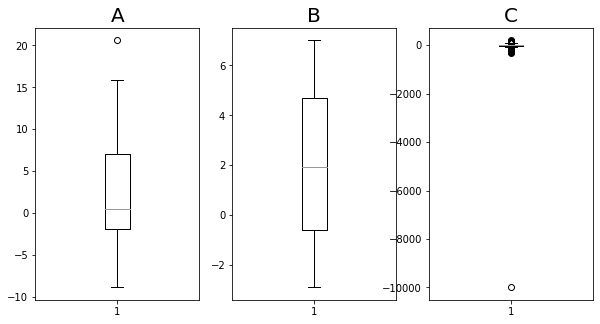

In [173]:
import matplotlib.pyplot as plt

#plotting Boxplot
plt.rcParams['figure.figsize'] = (10.0, 5.0)


plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(df['A'])
plt.title('A',fontsize=20)
plt.subplot(1, 3, 2)
plt.boxplot(df['B'])
plt.title('B',fontsize=20)
plt.subplot(1, 3, 3)
plt.boxplot(df['C'])
plt.title('C',fontsize=20)
plt.show()

In [174]:
#getting rid of the minimum C value
df_prepared = df[df['C'] != min(df['C'])]

#Checking the Correlations
corr_matrix=df_prepared.corr()
corr_matrix


#the correlation between A and C is low
#the correlation between B and C is over 0.5 

,A,B,C
A,1.000000,-0.187059,0.010536
B,-0.187059,1.000000,-0.618516
C,0.010536,-0.618516,1.000000


In [175]:
#Standardizing the Data
df_prepared['A']=(df_prepared['A']-np.mean(df_prepared['A']))/np.std(df_prepared['A'])
df_prepared['B']=(df_prepared['B']-np.mean(df_prepared['B']))/np.std(df_prepared['B'])

#Splitting train and test:
# This is particularly important when we test polynomial with higher degree as those models are particularly 
# susceptible to overfitting

def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

train, test = split_train_test(df_prepared, 0.2)
X_train=(train.iloc[:,:-1])
X_test=test.iloc[:,:-1]

y_test=test['C']
y_train=train['C']

((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

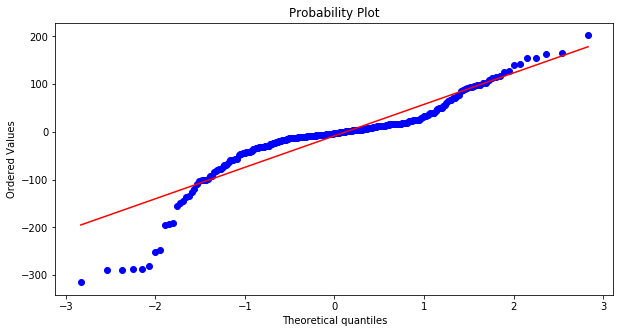

In [130]:
scipy.stats.probplot(y.values, dist="norm", plot=plt)


## Implementing Linear Regression
Based on the eda, the linear regression would not work well especially because of the variable A. Here, we will implement both linear regression to see if one performs better than the other. For simplicity, we are going to fit the data using normal equation for linear regression and for logistic regression, we are going to use gradient descent.



In [116]:
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_predict) ** 2) / len(y))
    return rmse

def r2(y,y_predict):
    sst=np.sum((y-np.mean(y))**2)
    sse=np.sum((y-y_predict)**2)
    return 1-(sse/sst)

class MyLinearRegression:
    def __init__ (self,i):
        """
        Initializing the regressor
        """
        self.theta=np.zeros(i,float)[:,np.newaxis]; #parameter vector; random
    
    def fitUsingNormalEquation(self,X_train,y_train):
        """
        Training using the Closed Form Equation
        """
        X_b=np.c_[np.ones(len(X_train)),X_train] #adding additional column
        theta_best=np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta=theta_best
    
    def predict(self,X_test):
        """
        Predicting the label
        """
        X_test = np.c_[np.ones((len(X_test),1)), X_test]
        y_predict = np.dot(X_test,self.theta)
        
        return y_predict
    

## Models

In [176]:
## Linear Regression
    

# Model 1: Regular
model1= MyLinearRegression(2)
model1.fitUsingNormalEquation(X_train.values,y_train.values)
y_predict =model1.predict(X_test.values)
rmse1=rmse(y_test.values, y_predict)
r2_1=r2(y_test.values, y_predict)


print("test rmse:",rmse1)
print("r^2:",r2_1)

test rmse: 65.4043661960696
r^2: 0.23552381755424157


In [151]:
np.std(y.values)

71.20250489661885

Given that the standard deviation of y (C) value is 71.2025, the model1 is performance is relatively good as the rmse is smaller than 1 standard deviation. However, based on our correlation matrix and qq plot, we knew that the linear model might not be the best. We will also add a polynomial term on the linear regression especially variable A as well as other interaction terms.

In [177]:
# Model 2: Polynomial Equation B**2

X_train['B2']=X_train['B']**2
X_test['B2']=X_test['B']**2

model2= MyLinearRegression(3)
model2.fitUsingNormalEquation(X_train.values,y_train.values)
y_predict =model2.predict(X_test.values)
rmse2=rmse(y_test.values, y_predict)
r2_2=r2(y_test.values, y_predict)

print("test rmse:",rmse2)
print("r^2:",r2_2)


test rmse: 66.30635909864421
r^2: 0.21429260794645022


The test rmse increased from linear model; adding $b^2$ is not effective

In [181]:
# Model 3:Polynomial Equation A**2
#resetting the data
X_train=(train.iloc[:,:-1])
X_test=test.iloc[:,:-1]

y_test=test['C']
y_train=train['C']

#adding square of A
X_train['A2']=X_train['A']**2
X_test['A2']=X_test['A']**2

model3= MyLinearRegression(3)
model3.fitUsingNormalEquation(X_train.values,y_train.values)
y_predict =model3.predict(X_test.values)
rmse3=rmse(y_test.values, y_predict)
r2_3=r2(y_test.values, y_predict)

print("test rmse:",rmse3)
print("r^2:",r2_3)


test rmse: 63.17020818681894
r^2: 0.28685951382907726


The test rmse decreased around 2.2. This is performing better than the linear regression. Now we are going to add both $b^2$ and $a^2$

In [189]:
# Model 4: Polynomial Equation B**2 with A**2
X_train['B2']=X_train['B']**2
X_test['B2']=X_test['B']**2

model4= MyLinearRegression(3)
model4.fitUsingNormalEquation(X_train.values,y_train.values)
y_predict =model4.predict(X_test.values)
rmse4=rmse(y_test.values, y_predict)
r2_4=r2(y_test.values, y_predict)

print("rmse:",rmse4)
print("r^2:",r2_4)

rmse: 43.4425958881718
r^2: 0.6627266602104427


This is the best model so far with the lowest rmse and highest $r^2$. I also want to test interaction variable and how it performs for the next model.

In [190]:
# Model 5: Polynomial Equation A
#resetting the data
X_train=(train.iloc[:,:-1])
X_test=test.iloc[:,:-1]

y_test=test['C']
y_train=train['C']

#adding interaction variable
X_train['AB']=X_train['A']*X_train['B']
X_test['AB']=X_test['A']*X_test['B']

model5= MyLinearRegression(3)
model5.fitUsingNormalEquation(X_train.values,y_train.values)
y_predict =model3.predict(X_test.values)
rmse5=rmse(y_test.values, y_predict)
r2_5=r2(y_test.values, y_predict)

print("test rmse:",rmse5)
print("r^2:",r2_5)


test rmse: 65.47528125549218
r^2: 0.23386514345127696


Out of the five models tested, model 4 with polynomial regression of $A^2$ and $B^2$ was the best performing model. The final rmse was 43.4425958881718 and $r^2$ was 0.6627, which are drastic improvements from the initial rmse of  All the models rmse were based on the test set prediction, which alleviates the potential problem of overfitting.However, for future studies, if there is a greater number of samples, I would like to implement 5-fold cross-validation to make sure to account for overfitting.
